In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the CSV file "Customer Churn.csv" located in the "data" folder
# and load it into a DataFrame named 'df'
DS

In [3]:
# Display the first few rows of the dataset to verify successful loading
df.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Display 5 random rows from the DataFrame to get a quick overview of the dataset
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3207,3694-GLTJM,Female,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),19.65,92.05,No
1088,7029-RPUAV,Male,1,Yes,No,17,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),100.45,1622.45,Yes
960,2826-DXLQO,Male,1,Yes,No,7,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),29.80,220.45,No
3229,5519-NPHVG,Female,0,No,No,12,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.20,1046.1,Yes
487,3649-JPUGY,Male,0,No,No,72,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),88.60,6201.95,No


In [5]:
# Display all unique values present in the 'MultipleLines' column
df['MultipleLines'].unique

<bound method Series.unique of 0       No phone service
1                     No
2                     No
3       No phone service
4                     No
              ...       
7038                 Yes
7039                 Yes
7040    No phone service
7041                 Yes
7042                  No
Name: MultipleLines, Length: 7043, dtype: object>

# CHECKING COLUMN

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df['InternetService'].unique

<bound method Series.unique of 0               DSL
1               DSL
2               DSL
3               DSL
4       Fiber optic
           ...     
7038            DSL
7039    Fiber optic
7040            DSL
7041    Fiber optic
7042    Fiber optic
Name: InternetService, Length: 7043, dtype: object>

In [8]:
df['MultipleLines'].unique

<bound method Series.unique of 0       No phone service
1                     No
2                     No
3       No phone service
4                     No
              ...       
7038                 Yes
7039                 Yes
7040    No phone service
7041                 Yes
7042                  No
Name: MultipleLines, Length: 7043, dtype: object>

In [9]:
df['DeviceProtection'].unique

<bound method Series.unique of 0        No
1       Yes
2        No
3       Yes
4        No
       ... 
7038    Yes
7039    Yes
7040     No
7041     No
7042    Yes
Name: DeviceProtection, Length: 7043, dtype: object>

# MAKING A BACKUP

In [10]:
# Create a backup copy of the original DataFrame to preserve the data
# This helps prevent data loss or accidental changes during analysis
BACKUP = df.copy()

# REPLACING BLANK WITH 0

In [16]:
# Replace blank or empty string values (" ") in the 'TotalCharges' column with "0"
#'inplace=True' ensures the changes are applied directly to the existing DataFrame
df['TotalCharges'].replace(" ", "0", inplace=True)

In [17]:
# Convert the 'TotalCharges' column data type from string (object) to float
df['TotalCharges']= df['TotalCharges'].astype('float')

In [18]:
# Display the values of the 'TotalCharges' column
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [33]:
# Check if (tenure × MonthlyCharges) ≈ TotalCharges to validate data consistency
a = round(df['tenure'] * df['MonthlyCharges']) == round(df['TotalCharges'])

In [34]:
a

0        True
1       False
2        True
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [35]:
a.sum()

np.int64(684)

# CHECKING NULL

In [21]:
# Display the total number of missing (null) values in each column of the DataFrame
df.isnull().sum() 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# CO RELATION

In [22]:
# Generate summary statistics (count, mean, std, min, max, etc.) for numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# CHECKING FOR DUPLICATES

In [23]:
# Count the total number of duplicate rows in the DataFrame
df.duplicated().sum()

np.int64(0)

# CHANGING SENIOR CITIZEN

In [24]:
def ZeroTollo(value):
    if value:
        return "Yes"
    else:
        return "No"

In [25]:
df['SeniorCitizen']= df['SeniorCitizen'].apply(ZeroTollo)

In [26]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


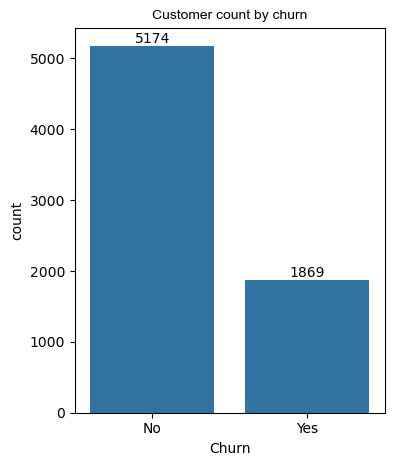

In [36]:
plt.figure(figsize=(4,5))
ax = sns.countplot(x="Churn", data=df)
ax.bar_label(ax.containers[0])
plt.title("Customer count by churn", fontdict={"fontsize":10, 'font': 'ARIAL'})
plt.show()

In [29]:
gb = df.groupby("Churn").agg({"Churn": "count"})

In [30]:
gb

,Churn
Churn,
No,5174
Yes,1869


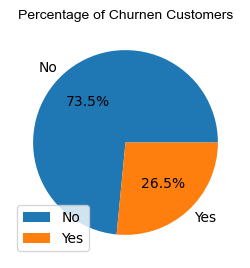

In [31]:
plt.figure(figsize=(3,3))
plt.pie(gb['Churn'], labels=gb.index, autopct='%1.1f%%')
plt.title("Percentage of Churnen Customers", fontdict={"fontsize":10, 'font': 'ARIAL'})
plt.legend()
plt.show()

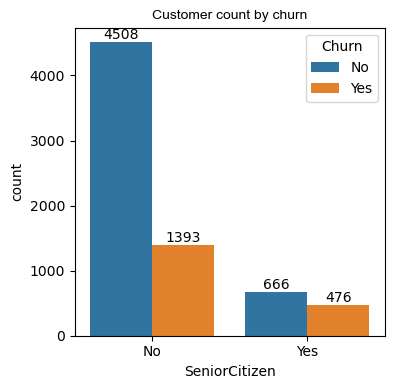

In [32]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x="SeniorCitizen", data=df, hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Customer count by churn", fontdict={"fontsize":10, 'font': 'ARIAL'})
plt.show()

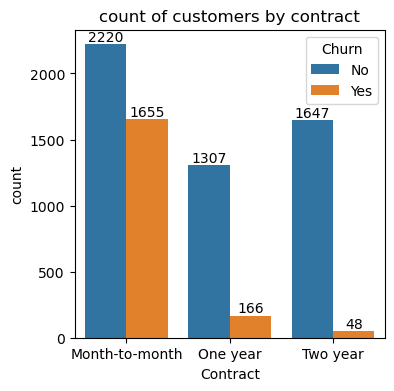

In [42]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x='Contract', data=df, hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("count of customers by contract")
plt.show()

In [43]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [59]:
columns = ['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'gender', 'SeniorCitizen', 'Partner']

In [62]:
len(columns)

12

In [60]:
axes.reshape(-1)

array([<Axes: title={'center': 'count plot of PhoneService'}, xlabel='PhoneService', ylabel='count'>,
       <Axes: title={'center': 'count plot of MultipleLines'}, xlabel='MultipleLines', ylabel='count'>,
       <Axes: title={'center': 'count plot of InternetService'}, xlabel='InternetService', ylabel='count'>,
       <Axes: title={'center': 'count plot of OnlineSecurity'}, xlabel='OnlineSecurity', ylabel='count'>,
       <Axes: title={'center': 'count plot of OnlineBackup'}, xlabel='OnlineBackup', ylabel='count'>,
       <Axes: title={'center': 'count plot of DeviceProtection'}, xlabel='DeviceProtection', ylabel='count'>,
       <Axes: title={'center': 'count plot of TechSupport'}, xlabel='TechSupport', ylabel='count'>,
       <Axes: title={'center': 'count plot of StreamingTV'}, xlabel='StreamingTV', ylabel='count'>,
       <Axes: title={'center': 'count plot of StreamingMovies'}, xlabel='StreamingMovies', ylabel='count'>],
      dtype=object)

0 PhoneService
1 MultipleLines
2 InternetService
3 OnlineSecurity
4 OnlineBackup
5 DeviceProtection
6 TechSupport
7 StreamingTV
8 StreamingMovies
9 gender
10 SeniorCitizen
11 Partner


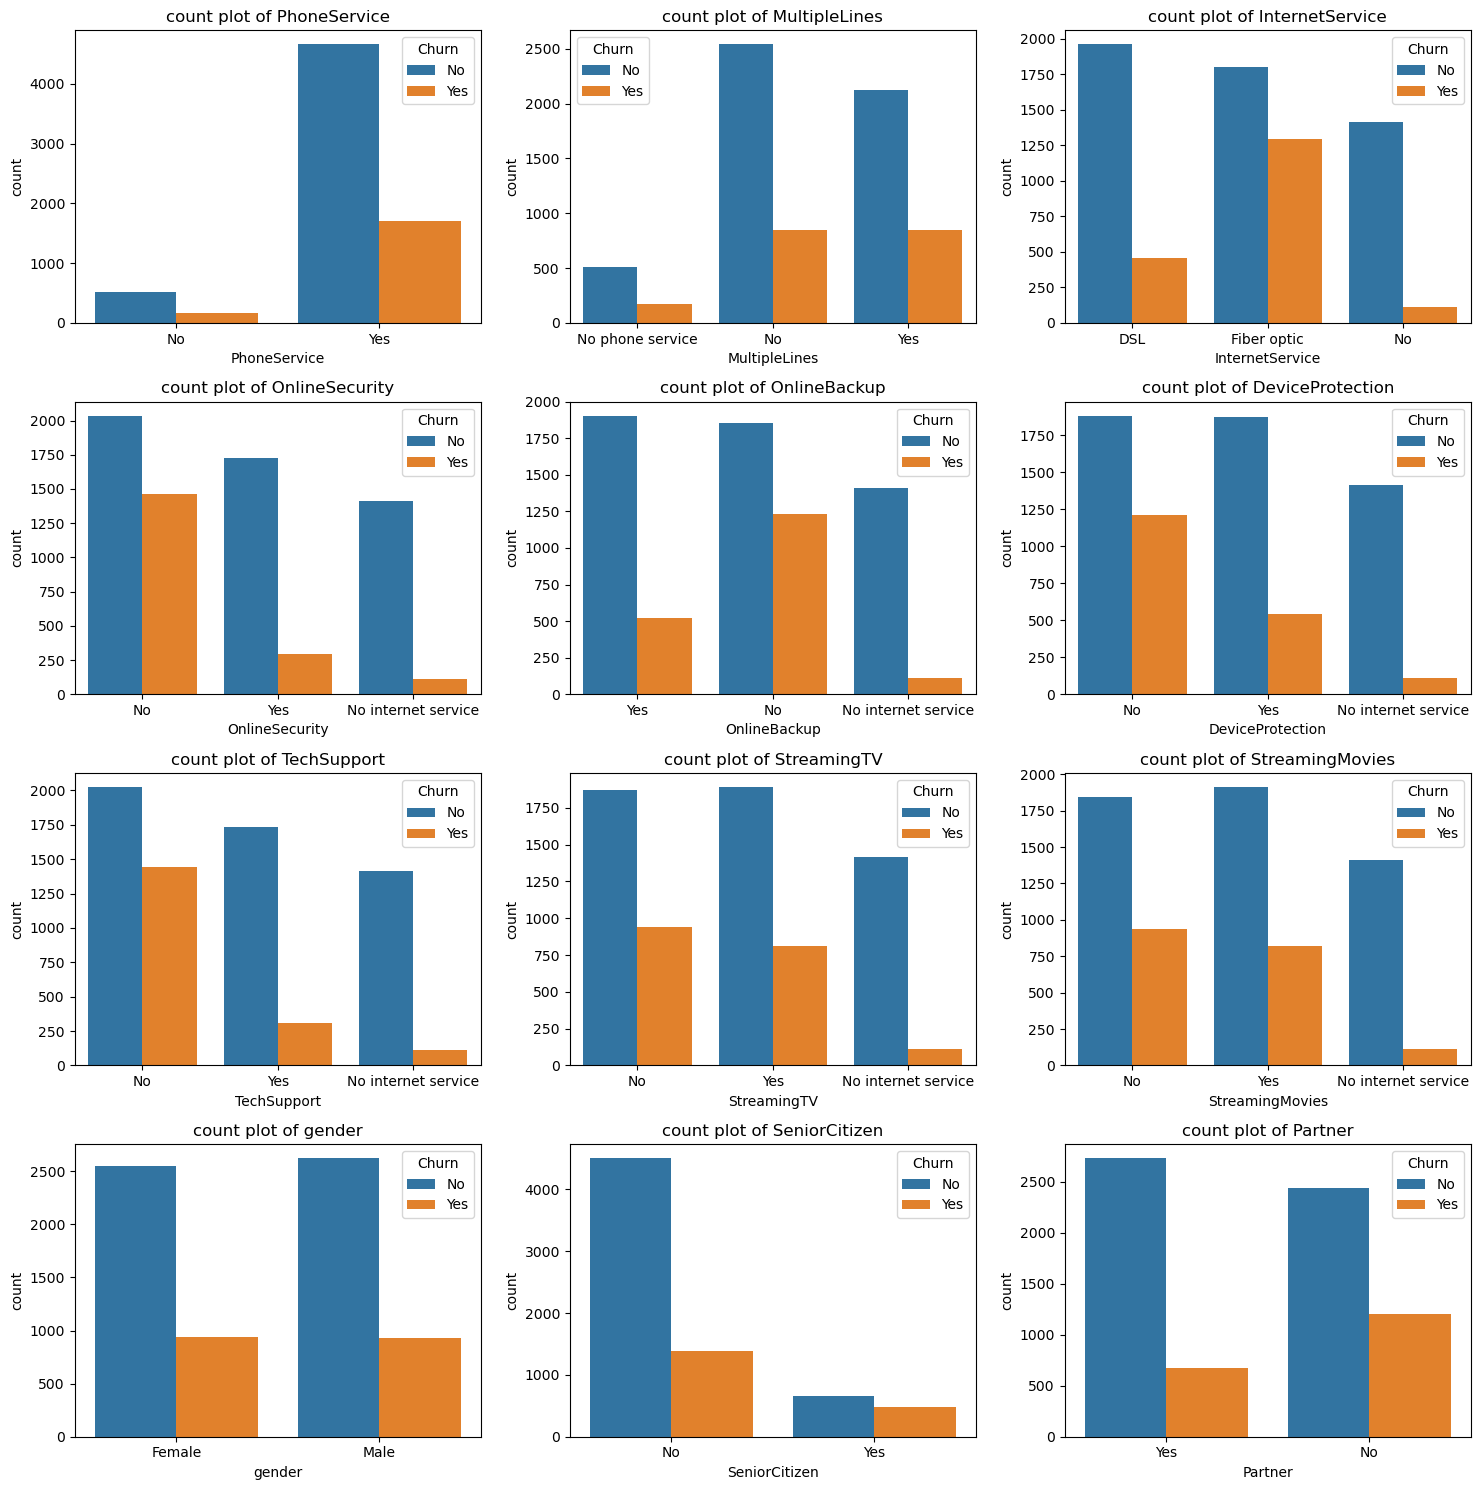

In [68]:
# Define the grid size
n_cols = 3
n_rows = 4

# Create subplots for visualization
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15,15))
axes = axes.flatten()

# Loop through selected columns and create count plots
for i in range(len(columns)):
    print(i, columns[i])
    sns.countplot(data=df, x=columns[i], hue=df['Churn'], ax=axes[i])
    axes[i].set_title(f'Count Plot of {columns[i]}', fontsize=12)
    
    # Add value labels on top of bars
    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%d', label_type='edge')

plt.tight_layout()
plt.show()


# CONCLUSION

In [ ]:
This code visually analyzes the relationship between multiple categorical features and the target variable “Churn” using count plots.
Each subplot displays the frequency distribution of different feature values, divided by churn status (e.g., Yes/No).
Through these graphs, we can easily compare how customer churn varies across different categories --helping to identify key patterns,  
trends and influential factors that contribute to customer churn.
In short, the visualization provides a comprehensive overview of categorical feature behavior and helps in understanding which features
most impact churn prediction.